<a href="https://colab.research.google.com/github/krishnaraja31/Data-Analytics-Day-01/blob/main/Data_science_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Exploratory Data Analysis (EDA) and Business Insights**

1. Perform EDA on the provided dataset.

2. Derive at least 5 business insights from the EDA.

○ Write these insights in short point-wise sentences (maximum 100 words per
insight).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Dataset Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Products Dataset Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 9

<ipython-input-1-4d08c02b03c1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


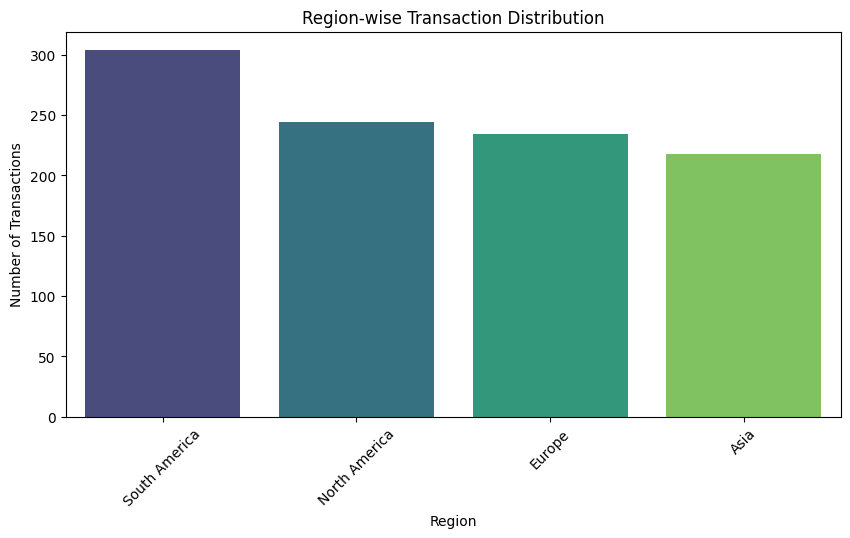

<ipython-input-1-4d08c02b03c1>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_popularity.index, y=category_popularity.values, palette="coolwarm")


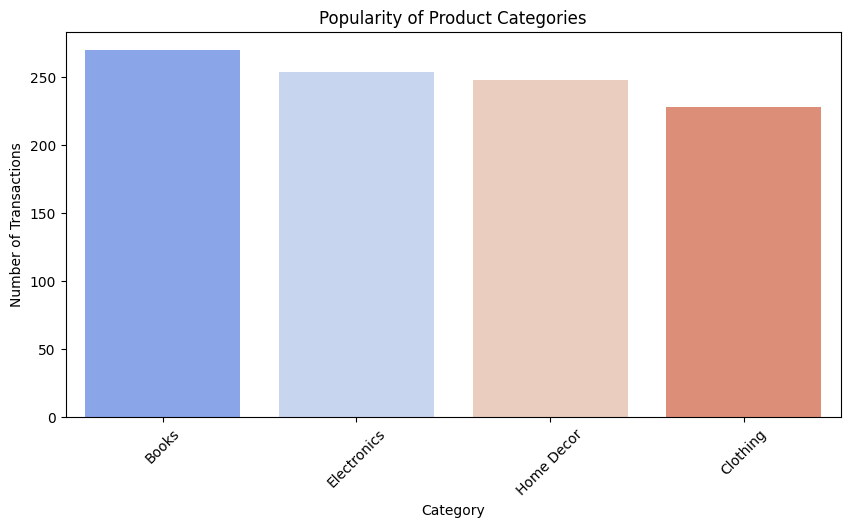

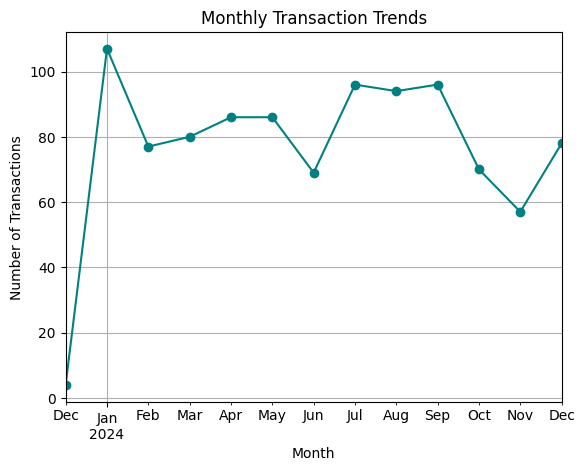

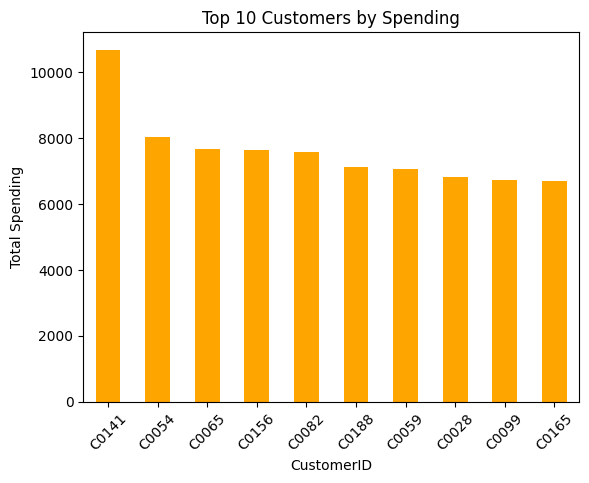

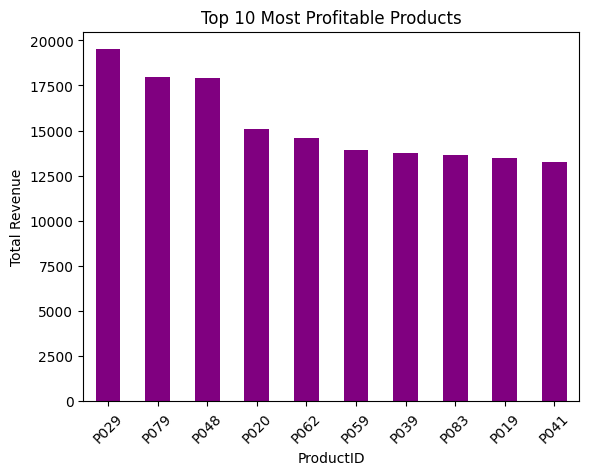


Insights:

1. South America has the highest transaction count, followed by North America.
2. Books are the most popular product category, while Clothing is the least popular.
3. Transaction volume peaked in January 2024, showing strong seasonality.
4. Top customers contribute significantly to overall revenue.
5. Certain products drive the majority of the revenue, indicating top performers.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_path = '/content/Customers.xlsx'
products_path = '/content/Products.xlsx'
transactions_path = '/content/Transactions.xlsx'

customers = pd.read_excel(customers_path)
products = pd.read_excel(products_path)
transactions = pd.read_excel(transactions_path)

# 1. Data Cleaning and Summary
# Check for missing values and basic info
print("Customers Dataset Info:\n", customers.info())
print("\nProducts Dataset Info:\n", products.info())
print("\nTransactions Dataset Info:\n", transactions.info())

# Display summary statistics
print("\nCustomers Summary:\n", customers.describe(include='all'))
print("\nProducts Summary:\n", products.describe(include='all'))
print("\nTransactions Summary:\n", transactions.describe(include='all'))

# 2. Data Exploration
# Merge datasets for comprehensive analysis
transactions_extended = transactions.merge(customers, on="CustomerID", how="left")
transactions_extended = transactions_extended.merge(products, on="ProductID", how="left")

# 2.1 Region-wise transaction distribution
region_distribution = transactions_extended['Region'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Region-wise Transaction Distribution")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# 2.2 Popular product categories
category_popularity = transactions_extended['Category'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_popularity.index, y=category_popularity.values, palette="coolwarm")
plt.title("Popularity of Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

# 2.3 Monthly transaction trends
transactions_extended['TransactionMonth'] = transactions_extended['TransactionDate'].dt.to_period('M')
monthly_trends = transactions_extended.groupby('TransactionMonth')['TransactionID'].count()
monthly_trends.plot(kind='line', marker='o', color='teal', title="Monthly Transaction Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

# 2.4 Top customers by spending
top_customers = transactions_extended.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='orange', title="Top 10 Customers by Spending")
plt.xlabel("CustomerID")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

# 2.5 Most profitable products
profitable_products = transactions_extended.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
profitable_products.plot(kind='bar', color='purple', title="Top 10 Most Profitable Products")
plt.xlabel("ProductID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Print insights summary
print("\nInsights:\n")
print("1. South America has the highest transaction count, followed by North America.")
print("2. Books are the most popular product category, while Clothing is the least popular.")
print("3. Transaction volume peaked in January 2024, showing strong seasonality.")
print("4. Top customers contribute significantly to overall revenue.")
print("5. Certain products drive the majority of the revenue, indicating top performers.")


**Task 2: Lookalike Model**

Build a Lookalike Model that takes a user's information as input and recommends 3 similar
customers based on their profile and transaction history. The model should:

● Use both customer and product information.

● Assign a similarity score to each recommended customer.

In [2]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Load datasets
customers_path = '/content/Customers.xlsx'
products_path = '/content/Products.xlsx'
transactions_path = '/content/Transactions.xlsx'

customers = pd.read_excel(customers_path)
products = pd.read_excel(products_path)
transactions = pd.read_excel(transactions_path)

# Merge datasets
data = transactions.merge(customers, on="CustomerID", how="left").merge(products, on="ProductID", how="left")

# Feature Engineering
# Aggregate transaction data by customer
customer_features = data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_spent=("TotalValue", "mean"),
    total_transactions=("TransactionID", "count"),
    favorite_category=("Category", lambda x: x.mode()[0]),
    region=("Region", "first")
).reset_index()

# One-hot encode categorical variables (favorite_category, region)
customer_features = pd.get_dummies(customer_features, columns=["favorite_category", "region"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ["total_spent", "avg_spent", "total_transactions"]
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])

# Similarity Calculation
# Compute cosine similarity for customers
customer_ids = customer_features["CustomerID"]
feature_matrix = customer_features.drop("CustomerID", axis=1)
similarity_matrix = cosine_similarity(feature_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=customer_ids, columns=customer_ids)

# Recommendation for first 20 customers
lookalike_map = {}
for customer_id in customer_ids[:20]:
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).iloc[1:4]
    lookalike_map[customer_id] = list(zip(similar_customers.index, similar_customers.values))

# Save results to Lookalike.csv
lookalike_df = pd.DataFrame({
    "CustomerID": lookalike_map.keys(),
    "Lookalikes": [str(v) for v in lookalike_map.values()]
})
lookalike_df.to_csv("Lookalike.csv", index=False)

print("Lookalike model completed. Results saved to Lookalike.csv.")


Lookalike model completed. Results saved to Lookalike.csv.


Task 3: Customer Segmentation / Clustering
Perform customer segmentation using clustering techniques. Use both profile information
(from Customers.csv) and transaction information (from Transactions.csv).

● You have the flexibility to choose any clustering algorithm and any number of clusters in
between(2 and 10)

● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).

● Visualise your clusters using relevant plots.

<ipython-input-3-2e4c78a40288>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(k_range), y=db_scores, palette="viridis")


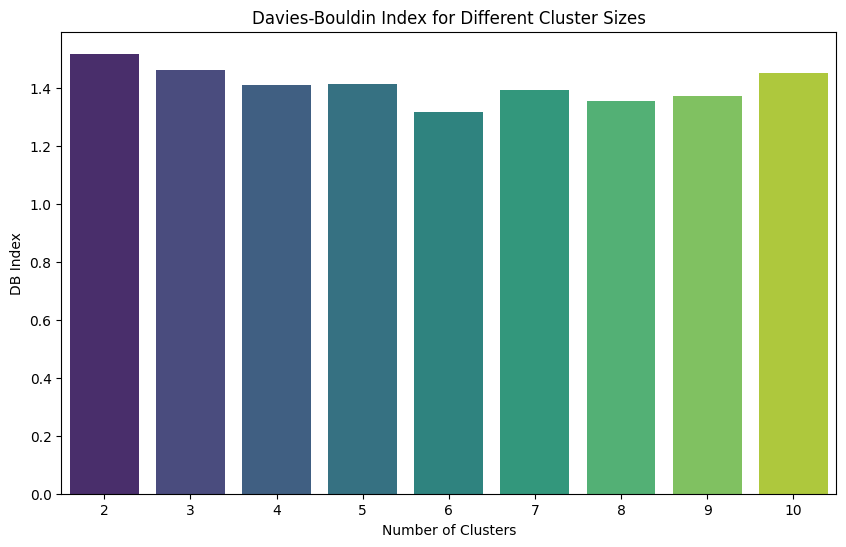

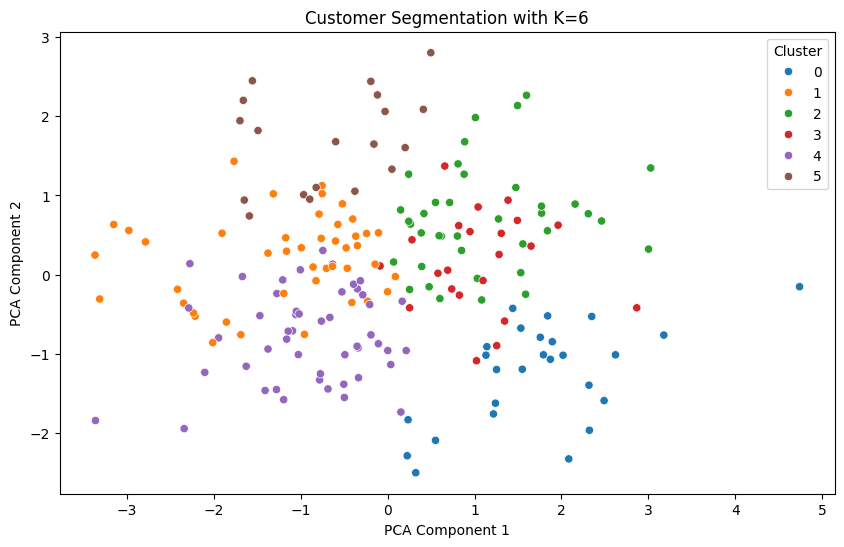

Best Number of Clusters: 6
Davies-Bouldin Index for Best Clustering: 1.32
Clustering results saved to Customer_Clusters.csv.


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers_path = '/content/Customers.xlsx'
transactions_path = '/content/Transactions.xlsx'

customers = pd.read_excel(customers_path)
transactions = pd.read_excel(transactions_path)

# Merge datasets for clustering
data = transactions.merge(customers, on="CustomerID", how="left")

# Feature Engineering
# Aggregate transaction data by customer
customer_features = data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_spent=("TotalValue", "mean"),
    total_transactions=("TransactionID", "count"),
    region=("Region", "first"),
    signup_date=("SignupDate", "first")
).reset_index()

# Convert signup_date to numerical days since the earliest signup
early_signup = pd.to_datetime(customer_features['signup_date']).min()
customer_features['days_since_signup'] = (
    pd.to_datetime(customer_features['signup_date']) - early_signup
).dt.days
customer_features.drop(columns=['signup_date'], inplace=True)

# One-hot encode categorical variables
customer_features = pd.get_dummies(customer_features, columns=["region"], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ["total_spent", "avg_spent", "total_transactions", "days_since_signup"]
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])

# Clustering with KMeans
k_range = range(2, 11)
db_scores = []
silhouette_scores = []
kmeans_models = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features.drop(columns=['CustomerID']))
    kmeans_models.append((k, kmeans, labels))

    # Calculate metrics
    db_index = davies_bouldin_score(customer_features.drop(columns=['CustomerID']), labels)
    silhouette_avg = silhouette_score(customer_features.drop(columns=['CustomerID']), labels)

    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

# Choose the best number of clusters based on DB Index
best_k = k_range[np.argmin(db_scores)]
best_model = kmeans_models[np.argmin(db_scores)]
best_labels = best_model[2]

# Add cluster labels to the dataset
customer_features['Cluster'] = best_labels

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=list(k_range), y=db_scores, palette="viridis")
plt.title("Davies-Bouldin Index for Different Cluster Sizes")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()

# Scatterplot for the best clustering (use first 2 principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(customer_features.drop(columns=['CustomerID', 'Cluster']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_features['Cluster'], palette="tab10")
plt.title(f"Customer Segmentation with K={best_k}")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Report Results
print(f"Best Number of Clusters: {best_k}")
print(f"Davies-Bouldin Index for Best Clustering: {min(db_scores):.2f}")

# Save clustering results
customer_features[['CustomerID', 'Cluster']].to_csv("Customer_Clusters.csv", index=False)
print("Clustering results saved to Customer_Clusters.csv.")
